In [53]:
# POWER CONSUMPTION IN INDIA DATA ANALYSIS AND DATA VISUALIZATION

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [55]:
dataset = pd.read_csv("/content/Statewise Consumption.csv")
dataset

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,05/12/2020 00:00:00,2.5
16595,Meghalaya,NER,25.570492,91.880014,05/12/2020 00:00:00,5.8
16596,Mizoram,NER,23.710399,92.720015,05/12/2020 00:00:00,1.6
16597,Nagaland,NER,25.666998,94.116570,05/12/2020 00:00:00,2.1


In [56]:
dataset.describe()

,latitude,longitude,Usage
count,16599.000000,16599.000000,16599.000000
mean,23.178220,81.794533,103.001862
std,6.146575,7.258429,116.044056
min,8.900373,71.192400,0.300000
25%,19.820430,76.569993,6.700000
50%,23.835404,78.570026,64.400000
75%,27.333330,88.329947,173.900000
max,33.450000,94.216667,522.100000


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [58]:
# DATA PREPROCESSING

In [59]:
dataset.isnull().sum()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [60]:
dataset.fillna(method='ffill', inplace=True)
dataset.dropna(inplace=True)

In [61]:
# In Dates column date and time are combined so we need to seperate it out.

In [62]:
dataset["Dates"] = pd.to_datetime(dataset["Dates"], errors='coerce')
print(dataset.head())

      States Regions   latitude  longitude      Dates  Usage
0     Punjab      NR  31.519974  75.980003 2019-02-01  119.9
1    Haryana      NR  28.450006  77.019991 2019-02-01  130.3
2  Rajasthan      NR  26.449999  74.639981 2019-02-01  234.1
3      Delhi      NR  28.669993  77.230004 2019-02-01   85.8
4         UP      NR  27.599981  78.050006 2019-02-01  313.9


In [63]:
dataset['New_time']=pd.to_datetime (dataset['Dates']).dt.time
dataset1=dataset
dataset.head()

,States,Regions,latitude,longitude,Dates,Usage,New_time
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9,00:00:00
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3,00:00:00
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1,00:00:00
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8,00:00:00
4,UP,NR,27.599981,78.050006,2019-02-01,313.9,00:00:00


In [64]:
# Generate lag features (example: 1 day lag)
for state in dataset.columns[1:]:
    dataset[f'{state}_lag1'] = dataset[state].shift(1)

# Drop rows with NaN values generated by shifting
dataset.dropna(inplace=True)


print(dataset.head())


        States Regions   latitude  longitude      Dates  Usage  New_time  \
1      Haryana      NR  28.450006  77.019991 2019-02-01  130.3  00:00:00   
2    Rajasthan      NR  26.449999  74.639981 2019-02-01  234.1  00:00:00   
3        Delhi      NR  28.669993  77.230004 2019-02-01   85.8  00:00:00   
4           UP      NR  27.599981  78.050006 2019-02-01  313.9  00:00:00   
5  Uttarakhand      NR  30.320409  78.050006 2019-02-01   40.7  00:00:00   

  Regions_lag1  latitude_lag1  longitude_lag1 Dates_lag1  Usage_lag1  \
1           NR      31.519974       75.980003 2019-02-01       119.9   
2           NR      28.450006       77.019991 2019-02-01       130.3   
3           NR      26.449999       74.639981 2019-02-01       234.1   
4           NR      28.669993       77.230004 2019-02-01        85.8   
5           NR      27.599981       78.050006 2019-02-01       313.9   

  New_time_lag1  
1      00:00:00  
2      00:00:00  
3      00:00:00  
4      00:00:00  
5      00:00:00  


In [65]:
# Parse datetime
dataset['Dates'] = pd.to_datetime(dataset['Dates'], format="%d-%m-%Y %H:%M", dayfirst=True)

# Extract datetime features
dataset['year'] = dataset['Dates'].dt.year
dataset['month'] = dataset['Dates'].dt.month
dataset['day'] = dataset['Dates'].dt.day
dataset['hour'] = dataset['Dates'].dt.hour
dataset['day_of_week'] = dataset['Dates'].dt.dayofweek
dataset['is_weekend'] = dataset['day_of_week'] >= 5

In [66]:
dataset

,States,Regions,latitude,longitude,Dates,Usage,New_time,Regions_lag1,latitude_lag1,longitude_lag1,Dates_lag1,Usage_lag1,New_time_lag1,year,month,day,hour,day_of_week,is_weekend
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3,00:00:00,NR,31.519974,75.980003,2019-02-01,119.9,00:00:00,2019,2,1,0,4,False
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1,00:00:00,NR,28.450006,77.019991,2019-02-01,130.3,00:00:00,2019,2,1,0,4,False
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8,00:00:00,NR,26.449999,74.639981,2019-02-01,234.1,00:00:00,2019,2,1,0,4,False
4,UP,NR,27.599981,78.050006,2019-02-01,313.9,00:00:00,NR,28.669993,77.230004,2019-02-01,85.8,00:00:00,2019,2,1,0,4,False
5,Uttarakhand,NR,30.320409,78.050006,2019-02-01,40.7,00:00:00,NR,27.599981,78.050006,2019-02-01,313.9,00:00:00,2019,2,1,0,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,2020-05-12,2.5,00:00:00,NER,26.749981,94.216667,2020-05-12,20.3,00:00:00,2020,5,12,0,1,False
16595,Meghalaya,NER,25.570492,91.880014,2020-05-12,5.8,00:00:00,NER,24.799971,93.950017,2020-05-12,2.5,00:00:00,2020,5,12,0,1,False
16596,Mizoram,NER,23.710399,92.720015,2020-05-12,1.6,00:00:00,NER,25.570492,91.880014,2020-05-12,5.8,00:00:00,2020,5,12,0,1,False
16597,Nagaland,NER,25.666998,94.116570,2020-05-12,2.1,00:00:00,NER,23.710399,92.720015,2020-05-12,1.6,00:00:00,2020,5,12,0,1,False


In [67]:
dataset1["Regions"].unique()

array(['NR', 'WR', 'SR', 'ER', 'NER'], dtype=object)

In [68]:
# Maximum and Minimum Power consumption

In [69]:
dataset1[dataset1["Usage"] == dataset["Usage"].max()]

,States,Regions,latitude,longitude,Dates,Usage,New_time,Regions_lag1,latitude_lag1,longitude_lag1,Dates_lag1,Usage_lag1,New_time_lag1,year,month,day,hour,day_of_week,is_weekend
9252,Maharashtra,WR,19.250232,73.160175,2019-12-10,500.6,00:00:00,WR,21.300391,76.130019,2019-12-10,208.4,00:00:00,2019,12,10,0,1,False


In [70]:
# from above state Maharashtra consumed Max(522.1 MW) power

In [71]:
dataset1[dataset1["Usage"] == dataset["Usage"].min()]

,States,Regions,latitude,longitude,Dates,Usage,New_time,Regions_lag1,latitude_lag1,longitude_lag1,Dates_lag1,Usage_lag1,New_time_lag1,year,month,day,hour,day_of_week,is_weekend
12730,Sikkim,ER,27.33333,88.616647,2020-03-02,0.3,00:00:00,ER,22.58039,88.329947,2020-03-02,120.5,00:00:00,2020,3,2,0,0,False


In [72]:
# from above state Sikkim consumed Min (0.3 MW) power

<Axes: xlabel='year', ylabel='Usage'>

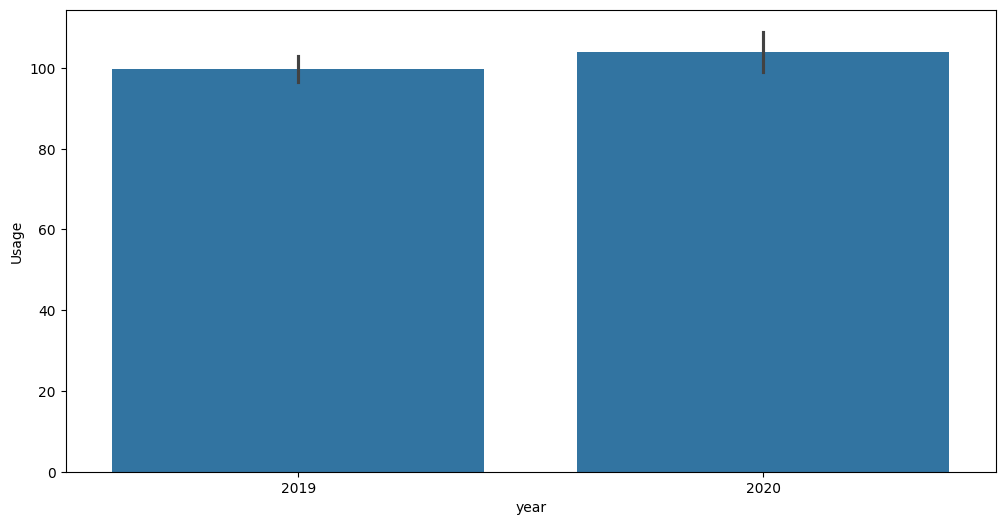

In [73]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'year',y='Usage',data=dataset)

<Axes: xlabel='Regions', ylabel='Usage'>

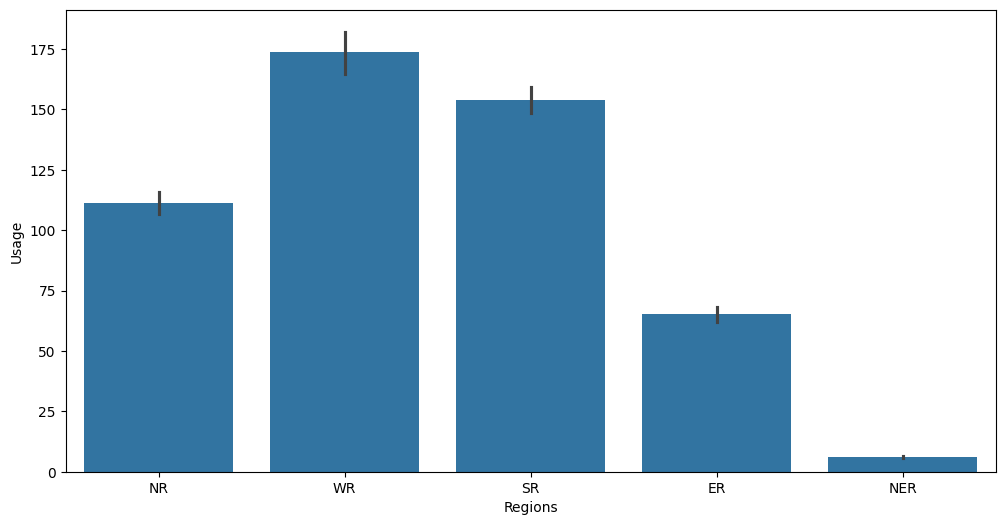

In [74]:
# Region wise power cunsumption
plt.figure(figsize = (12,6))
sns.barplot(x = 'Regions',y='Usage',data=dataset)

<Axes: xlabel='States', ylabel='Usage'>

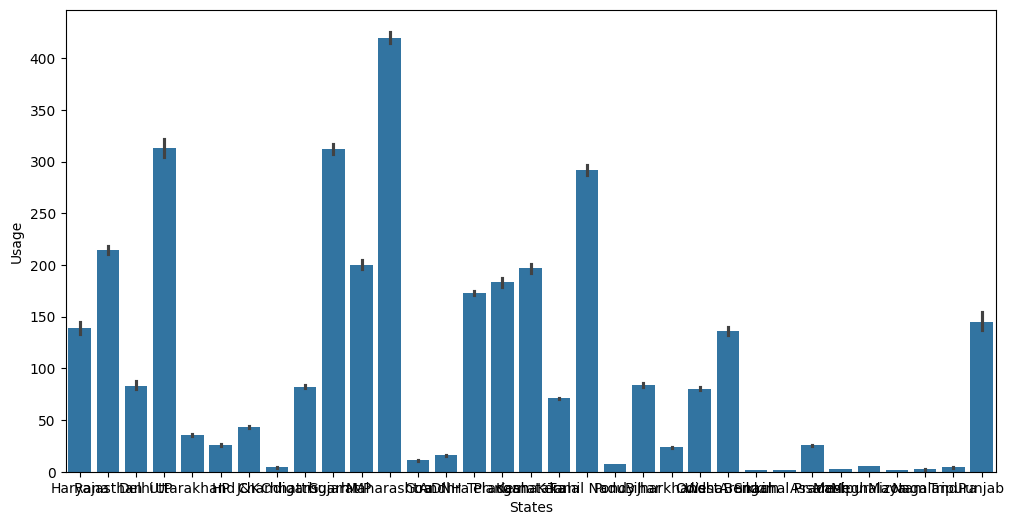

In [75]:
# bar graph is the mapping between 33 states and their power consumption in the year 2019 and 2020.

plt.figure(figsize = (12,6))
sns.barplot(x = 'States',y='Usage',data=dataset)

<Axes: xlabel='Dates', ylabel='Usage'>

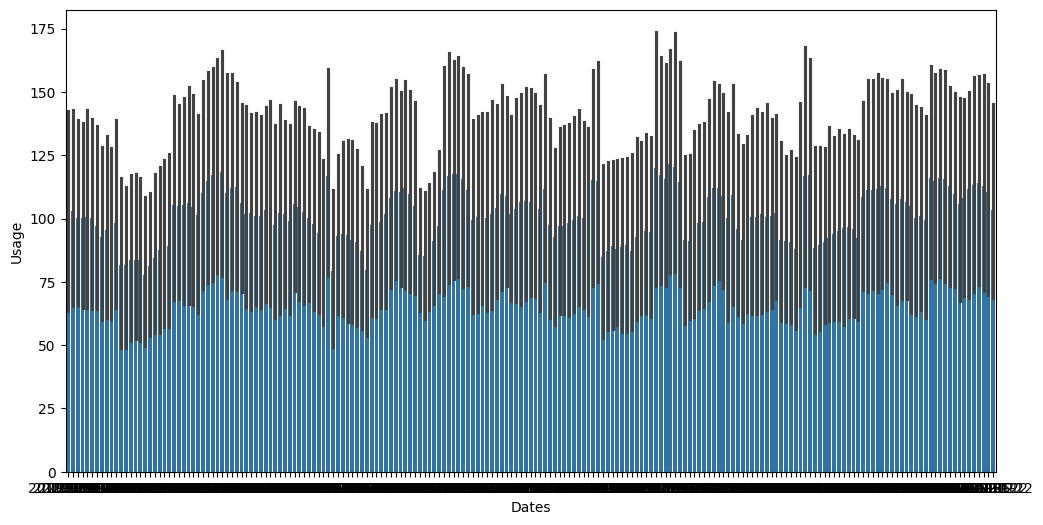

In [76]:
# bargraph shows the representation of the power consumption of day to day
plt.figure(figsize = (12,6))
sns.barplot(x = 'Dates',y='Usage',data=dataset)

In [77]:
# TRAINING AND TESTING DATA

In [78]:
X = dataset[['year', 'month', 'day', 'hour', 'day_of_week', 'is_weekend']]
y = dataset["States"]

In [79]:
# Encoded categorical data (y) into numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [81]:
X_train

,year,month,day,hour,day_of_week,is_weekend
13483,2020,4,3,0,4,False
6188,2019,10,7,0,0,False
11930,2020,3,1,0,6,True
14224,2020,3,4,0,2,False
15743,2020,5,7,0,3,False
...,...,...,...,...,...,...
9227,2019,11,10,0,6,True
14315,2020,5,4,0,0,False
14945,2020,1,5,0,6,True
15473,2020,1,6,0,0,False


In [82]:
X_test

,year,month,day,hour,day_of_week,is_weekend
16017,2020,3,9,0,0,False
4881,2019,3,6,0,2,False
2160,2019,10,3,0,3,False
16121,2020,1,10,0,4,False
16308,2020,2,11,0,1,False
...,...,...,...,...,...,...
11867,2020,1,1,0,2,False
10235,2019,12,11,0,2,False
10047,2019,5,11,0,5,True
4853,2019,3,6,0,2,False


In [83]:
y_train

array([27, 14, 14, ..., 19, 19, 31])

In [84]:
y_test

array([17, 20,  0, ...,  0, 25, 14])

In [85]:
# TRAINING MODEL: USING RANDOM FOREST

In [86]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [87]:
dataset1["States"]

1            Haryana
2          Rajasthan
3              Delhi
4                 UP
5        Uttarakhand
            ...     
16594        Manipur
16595      Meghalaya
16596        Mizoram
16597       Nagaland
16598        Tripura
Name: States, Length: 6516, dtype: object

In [88]:
# MODEL PREDICTION

In [89]:
y_pred = model.predict(X_test)
y_pred.shape

(1304,)

In [90]:
# MODEL EVALUATION

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
f'MAE: {mae}, RMSE: {rmse}'

'MAE: 8.473428843245216, RMSE: 9.866718961256565'

In [92]:
# FEATURE IMPORTANCE

In [93]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feature_importances

day            0.341988
month          0.312811
day_of_week    0.252595
year           0.064580
is_weekend     0.028026
hour           0.000000
dtype: float64